Perceptron Model

In [1]:
import numpy as np

class Perceptron(object):
    '''
    
    Parameters
    ------------
    eta : float
        Learning rate
    n_iter : int
        Number of passes over training set
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of musclassification in every epoch

    '''
    
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

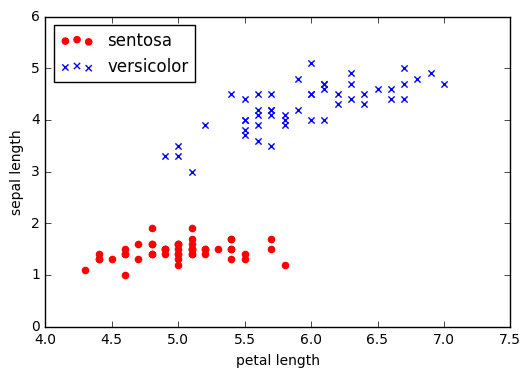

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='sentosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker='x', label='versicolor')

plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

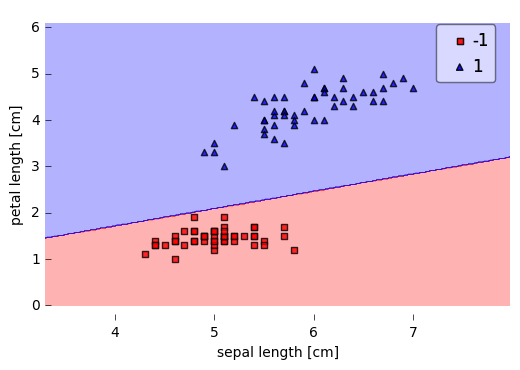

In [3]:
from mlxtend.evaluate import plot_decision_regions

ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)

plot_decision_regions(X, y, clf=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

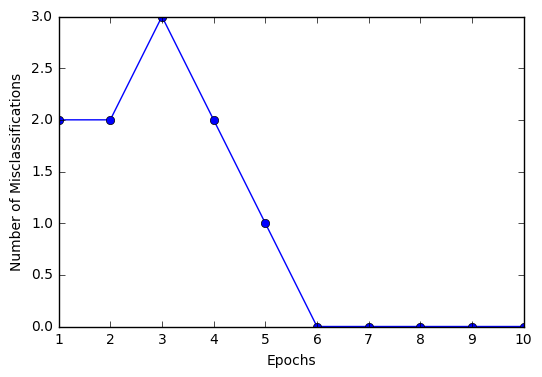

In [4]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()